Populating the interactive namespace from numpy and matplotlib
Cu_orbs =  ['d3z2r2', 'dx2y2', 'dxy', 'dxz', 'dyz']
O1_orbs =  ['px']
O2_orbs =  ['py']
symmetries =  ['1A1']
E_1S =  12.66
E_1G =  8.26
E_1D =  7.21
E_3P =  7.55
E_3F =  5.3


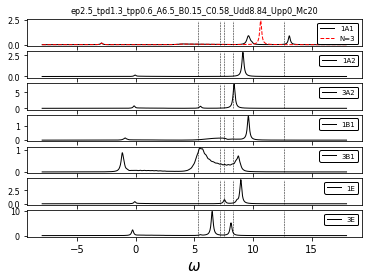

In [1]:
# compare the Aw (1A1 sym) for 3-, 7-orbital models

%pylab inline

import math
import numpy as np
from scipy.sparse.linalg import inv
#from numpy.linalg import inv
import scipy.sparse as sps
import scipy.sparse.linalg
import sys
import matplotlib.pyplot as plt
sys.path.append('../../src/')
from pylab import *

import parameters as pam
import lattice as lat
import variational_space as vs
import hamiltonian as ham
import basis_change as basis
import lanczos

ed = 0
ep = 2.5

tpd = 1.3
tpp = 0.6

pds = 1.5
pdp = 0.7
#pds = 0.00001
#pdp = 0.00001
pps = 1.0
ppp = 0.3

A = 6.5
B = 0.15
C = 0.58
Udd = A+4*B+3*C
Upp = 0

Mc3 = 20
Mc7 = 20

fNorb3 = 'ep'+str(ep)+'_tpd'+str(tpd)+'_tpp'+str(tpp)+ \
            '_Udd'+str(Udd)+'_Upp'+str(Upp)+'_Mc'+str(Mc3)+'_Norb'+str(3)
fNorb7 = 'ep'+str(ep)+'_tpd'+str(tpd)+'_tpp'+str(tpp)+ \
            '_A'+str(A)+'_B'+str(B)+'_C'+str(C)+'_Upp'+str(Upp)+'_Mc'+str(Mc7)+'_Norb'+str(7)
titlename = 'ep'+str(ep)+'_tpd'+str(tpd)+'_tpp'+str(tpp)+ \
            '_A'+str(A)+'_B'+str(B)+'_C'+str(C)+'_Udd'+str(Udd)+'_Upp'+str(Upp)+'_Mc'+str(Mc7)      

##########################################################################
# compare w of lowest peak
##########################################################################
Ms = ['-b','-r','-g','-m','-c','-k','-y','--b','--r','--g','--m','--c','--k','--y']

def plot_atomic_multiplet_peaks(maxval,Nsym):
    offset = 0.8
    y1 = 1.9
    y2 = 2.0
    yy = [0,maxval]
    xx = [pam.E_1S,pam.E_1S]
    plt.plot(xx, yy,'--k', linewidth=0.5)
    xx = [pam.E_1G,pam.E_1G]
    plt.plot(xx, yy,'--k', linewidth=0.5)
    xx = [pam.E_1D,pam.E_1D]
    plt.plot(xx, yy,'--k', linewidth=0.5)
    xx = [pam.E_3P,pam.E_3P]
    plt.plot(xx, yy,'--k', linewidth=0.5)
    xx = [pam.E_3F,pam.E_3F]
    plt.plot(xx, yy,'--k', linewidth=0.5)
    
    if Nsym==1:
        text(pam.E_1S-offset, y2, '$E_{1S}$', fontsize=8)
        text(pam.E_1G-offset, y1, '$E_{1G}$', fontsize=8)
        text(pam.E_1D-offset, y1, '$E_{1D}$', fontsize=8)
        text(pam.E_3P-offset, y2, '$E_{3P}$', fontsize=8)
        text(pam.E_3F-offset, y2, '$E_{3F}$', fontsize=8)
    
##########################################################################
if __name__ == '__main__': 
    symmetries = ['1A1','1A2','3A2','1B1','3B1','1E','3E']#,'1B2','3B2']
    Nsym = len(symmetries)
    for i in range(0,Nsym):
        sym = symmetries[i]

        if Nsym>1:
            subplot(Nsym,1,i+1)
        a = loadtxt('./data_Aw/'+fNorb7+'_'+sym+'.txt',skiprows=1)
        plot(a[:,0], a[:,1], '-k', linewidth=1, label=sym)

        if sym=='1A1':
            # plot N=3 result for comparison
            a = loadtxt('./data_Aw/'+fNorb3+'.txt',skiprows=1)
            plot(a[:,0], a[:,1], '--r', linewidth=1, label='N=3')

        maxval = max(a[:,1])
        plot_atomic_multiplet_peaks(maxval,Nsym)

        if i==0:
            title(titlename, fontsize=8)
        if i==Nsym-1:
            xlabel('$\omega$',fontsize=15)

        #xlim([-5,15])
        #xlim([-7.5,13])
        #ylim([0,0.5])
        #ylim([0,maxval])
        plt.yticks(fontsize=8)
        #ylabel('$A(\omega)$',fontsize=17)
        #text(0.45, 0.1, '(a)', fontsize=16)
        #grid('on',linestyle="--", linewidth=0.5, color='black', alpha=0.5)
        if symmetries==['1A1']:
            legend(loc='best', fontsize=10, framealpha=1.0, edgecolor='black') 
        else:
            legend(loc='best', fontsize=7, framealpha=1.0, edgecolor='black')
    
    if symmetries==['1A1']:
        savefig("imp_compare_Aw_Norb_"+titlename+"_enlarged.pdf")
    else:
        savefig("imp_compare_Aw_Norb_"+titlename+".pdf")